### 학습 목표
- 키워드 : 음식물 쓰레기 처리기
- 다양한 제품 조사를 위하여 지식인,카페,블로그 등 데이터를 수집하여 분석할수있다
- 리뷰데이터 수집후 전처리를 통해 워드클라우드를 생성할수 있다
- 기간설정을 통해 최근 6개월 데이터를 수집할수 있다 

In [13]:
from tqdm import tqdm
import pandas as pd
import requests as req 
from bs4 import BeautifulSoup as bs
import re
from kiwipiepy import Kiwi
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
# 컴퓨터용 브라우저 -> 데이터 요청 및 응답 
from selenium import webdriver as wb
# 컴퓨터용 키보드 (Enter,Del 등 ) 컴퓨터에게 키보드를 전달하는 역할 
from selenium.webdriver.common.keys import Keys 
# 선택자를 구분할때 사용하는 라이브러리 (필수)
from selenium.webdriver.common.by import By
#쉬는 시간을 주는 라이브러리 
import time

In [72]:
def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿]+", " ", w) 
  w = w.strip() 
  return w
 

In [ ]:
### 실습
1. 네이버 메인페이지 요청
2. "음식물 처리기 검색"
3. 지식인탭으로 이동 -> 지식인 탭 클릭
4. 기간설정을 통하여 6개월 이내의 데이터만 노출 

In [26]:
driver = wb.Chrome()
driver.get('https://www.naver.com/')
time.sleep(0.5)
search=driver.find_element(By.ID,'query')
search.send_keys('음식물 처리기')
search.send_keys(Keys.ENTER)
time.sleep(0.5)
#driver.find_element(By.CSS_SELECTOR,'#lnb > div.lnb_group > div > div.lnb_nav_area._nav_area_root > div > div.api_flicking_wrap._conveyer_root > div:nth-child(5) > a').click()
driver.find_elements(By.CSS_SELECTOR,'a.tab')[4].click()
driver.find_element(By.CSS_SELECTOR,'.spnew.ico_filter_arr').click()
time.sleep(0.5)
driver.find_elements(By.CSS_SELECTOR,'a.txt')[6].click()

- 스크롤바 내리기
   - 더많은 데이터를 수집하기 위함

In [29]:
# 요소.send_keys()
# 스크롤을 내리기위해서 (전체화면(body)에 end 키전송)

body=driver.find_element(By.TAG_NAME,'body')
body.send_keys(Keys.END)

In [31]:
for i in range(10):
    body=driver.find_element(By.TAG_NAME,'body')
    body.send_keys(Keys.END)
    time.sleep(0.3)

- 지식인 페이지에 노출되있는 게시글의 url 수집 

In [51]:
# 순수한 url 을 담기 
#요소.get_attribute('속성명')
link_list=[]
aTag=driver.find_elements(By.CSS_SELECTOR,'a.fender-ui_228e3bd1._F4b_iMlsFBN3anLCC2o')
aTag[0].get_attribute('href')
for i in aTag:
     link_list.append(i.get_attribute('href'))
link_list   

['https://kin.naver.com/qna/detail.naver?d1id=8&dirId=802&docId=490510354&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=802&docId=491046605&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=80101&docId=413811604&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=80201&docId=490688527&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=5&dirId=50503&docId=491234500&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=3&dirId=31501&docId=489794339&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=5&dirId=50104&docId=490729449&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyym

In [54]:
driver = wb.Chrome()
driver.get(link_list[0])

In [74]:
try:
    driver.find_element(By.CSS_SELECTOR,'#nextPageButton').click()
except:
    pass
a=driver.find_elements(By.CSS_SELECTOR,'.se-main-container')
content_list=[]
for i in a:
    content_list.append(preprocess_sentence_kr(i.text))
content_list

['내집 마련을 진심으로 축하드리며 음식물처리기는 삶의 질을 수직 상승시켜주는 최고의 선택인 만큼 렌탈을 고려하고 계신다면 매달 지출되는 고정 비용과 필터 교체비 걱정 없이 반영구적으로 편리하게 쓸 수 있는 다센 음식물처리기를 살펴보시길 권장해 드립니다. 렌탈 방식은 관리 면에서 편해 보일 수 있으나 장기적으로는 구매 비용보다 훨씬 많은 지출이 발생하고 특히 필터형 제품은 냄새 역류나 교체 번거로움이 뒤따르는데 다센은 필터 자체가 필요 없는 분쇄형 시스템이라 월 전기료 천 원 수준의 압도적인 경제성을 자랑하며 환경부 공식 인증을 받은 합법 제품이라 새집의 배관을 안전하게 지키면서도 음쓰 봉투 없는 완벽한 일상을 만들어 줍니다. 싱크대에서 페달만 밟으면 이십초 만에 모든 음식물이 즉시 처리되어 주방 위생을 완벽하게 유지할 수 있고 전문 엔지니어가 직접 방문하여 꼼꼼한 설치와 사후 관리까지 보장하니 아래 링크에서 실제 설치 사례와 사용자 만족도를 직접 확인해 보시고 현명한 선택 하시길 바랍니다. 다센 베이직클린 가정용 분쇄 싱크대 음식물처리기 고속 몰 고속 몰 좋은 제품을 합리적인 가격에 소비자와 함께 할 수 있도록 항상 노력하겠습니다. . .',
 '음식물처리기는 잔고장 없어야 합니다 잔고장이 있는지 실제 써보신분들 후기글들 참고 많이 해보세요 그리고 만약 고장이 나더라도 잘 되는지도 확인하세요',
 '음식물 처리기는 이미 100년전에 정답을 찾았습니다 디스포저는 한번설치로 10년이상 추가비용, 발생 없이 사용가능합니다 막힘원인이있다고 하는데 음식물이 아닌 일반 쓰러기를 갈아서 발생한 문제입니다 막힘 원인이 있으면 전세계 미국 중국 필리핀 베트남 이런데서 가장많이 선호할까요? 우리나라에도 사용한지 15년 되었는데 문제없이 없이 수명이 다해 재설치한 가정이 문제일으킨 가정보다 90프로이상 많습니다 거의 완벽한 검증이 된것입니다',
 '이 포스팅은 네이버 쇼핑 커넥트 활동의 일환으로, 판매 발생 시 수수료를 제공받습니다. 쿠쿠 건조분쇄형 에코웨일 음식물처리기 요즘 

In [61]:
driver.find_elements(By.CSS_SELECTOR,'.se-component-content')[1].text

'다센 베이직클린 가정용 분쇄 싱크대 음식물처리기 : 고속 K-몰\n[고속 K-몰] 좋은 제품을 합리적인 가격에 소비자와 함께 할 수 있도록 항상 노력하겠습니다.\nsmartstore.naver.com'

In [76]:
final_list=[]
driver = wb.Chrome()
for i in tqdm(range(len(link_list))):
    driver.get(link_list[i])
    time.sleep(0.3)
    try:
        driver.find_element(By.CSS_SELECTOR,'#nextPageButton').click()
    except:
        pass
    a=driver.find_elements(By.CSS_SELECTOR,'.se-main-container')
    content_list=[]
    for j in a:
        content_list.append(preprocess_sentence_kr(j.text))
    final_list.append(content_list)
driver.quit()
        

100%|██████████| 110/110 [14:12<00:00,  7.75s/it]


### 워드 클라우드 생성!
- 수집된 텍스트데이터로 워드 클라우드 만들기
- 키위라이브러리를 활용하여 토큰화
- 빈도수 상위100개 단어를 활용하여 생성 

1. 데이터 불러오기 (text)
2. 라이브러리 불러오기 (키위라브러리, 워드클라우드, 시각화라이브러리(matplotlib)
3. 키위객체생성 -> 토큰화 (token)
4. 일반명사(NNG), 고유명사(NNP) 리스트에 담기 (nn_list)  -> 조건문 사용시 리스트 안으로 넣어주기 ['NNG','NNP']
5. 빈도수 측정, 상위 100개 데이터를 저장 (top_100)
6. 워드클라우드 그리기~

SyntaxError: invalid syntax (674849860.py, line 3)

In [79]:
f=open('../../data/naver_data_pratice.txt','w',encoding='utf-8')
f.write(str(final_list))
f.close()        
driver.quit()   

In [80]:
f=open('../../data/naver_data.txt','r',encoding='utf-8')
review=f.readline()
f.close()




In [ ]:
kiwi=Kiwi()
#토큰화
token=kiwi.tokenize(review)

In [88]:

# 일반 명사만 추출 (NNG)
# token 의 리스트를 돌면서 tag가 NNG 인 form을 nng_list에 답으세요
nn_list=[]
for i in tqdm(token):
    if(i.tag=='NNG' or i.tag=='NNP'):
        nn_list.append(i.form)  

100%|██████████| 112553/112553 [00:00<00:00, 1061651.75it/s]


In [89]:
counter=Counter(nn_list)
top_100=counter.most_common(100)
top_100

[('음식물', 2092),
 ('처리', 2056),
 ('제품', 788),
 ('방식', 745),
 ('미생물', 568),
 ('건조', 565),
 ('사용', 497),
 ('분쇄', 415),
 ('쓰레기', 412),
 ('냄새', 392),
 ('환경', 291),
 ('소음', 290),
 ('확인', 289),
 ('관리', 256),
 ('지원', 242),
 ('구매', 240),
 ('가능', 236),
 ('구입', 234),
 ('렌탈', 233),
 ('가정', 225),
 ('추천', 223),
 ('설치', 217),
 ('지원금', 211),
 ('필요', 202),
 ('교체', 186),
 ('물', 180),
 ('필터', 178),
 ('신청', 174),
 ('후', 171),
 ('싱크대', 164),
 ('선택', 160),
 ('비용', 160),
 ('비교', 154),
 ('지자체', 149),
 ('전기료', 146),
 ('발생', 144),
 ('가격', 142),
 ('문제', 142),
 ('방법', 140),
 ('배출', 140),
 ('내부', 137),
 ('안녕', 134),
 ('참고', 131),
 ('내용', 131),
 ('후기', 130),
 ('뼈', 128),
 ('아래', 125),
 ('고민', 124),
 ('경우', 124),
 ('불편', 124),
 ('도움', 114),
 ('때', 113),
 ('답변', 111),
 ('부담', 109),
 ('미닉스', 107),
 ('주방', 106),
 ('악취', 106),
 ('일반', 100),
 ('정보', 100),
 ('통', 99),
 ('모델', 99),
 ('브랜드', 97),
 ('용량', 94),
 ('정도', 92),
 ('제공', 91),
 ('최대', 91),
 ('보조금', 90),
 ('이유', 87),
 ('기능', 87),
 ('기준', 86),
 ('정리', 86),
 ('인증', 84)

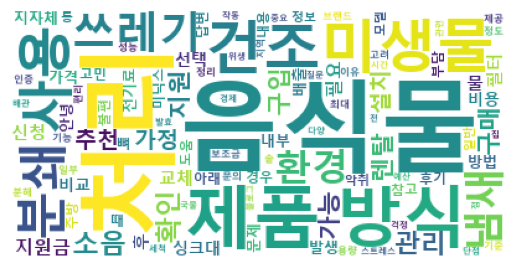

In [90]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white'    
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()